# Projet prédiction prix de l'électricité







In [1]:
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (15, 8)
sns.set()
sns.set(font_scale=1.5)

# Display up to 80 columns to keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

%matplotlib inline

In [2]:
# Load data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('X_train_elec.csv')


# Visualisation des données
df.head()

Saving X_train_elec.csv to X_train_elec.csv


,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,NaN
1,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,NaN
2,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,NaN
3,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,NaN
4,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,NaN


In [3]:

from google.colab import files
uploaded = files.upload()


y_train = pd.read_csv('y_train_elec.csv')


# Visualisation des données
y_train.head()

Saving y_train_elec.csv to y_train_elec.csv


,DELIVERY_START,spot_id_delta
0,2022-01-01 02:00:00+01:00,-36.874770
1,2022-01-01 03:00:00+01:00,-12.643588
2,2022-01-01 04:00:00+01:00,-1.950193
3,2022-01-01 05:00:00+01:00,1.938272
4,2022-01-01 06:00:00+01:00,0.199907


In [4]:



from google.colab import files
uploaded = files.upload()
df2 = pd.read_csv('X_test_elec.csv')


# Visualisation des données
df2.head()

Saving X_test_elec.csv to X_test_elec.csv


,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2023-04-02 00:00:00+02:00,45814.0,3386.0,10902.0,36705.0,6359.0,0.0,56.764535,0.0,NaN
1,2023-04-02 01:00:00+02:00,44084.0,3386.0,10902.0,36705.0,6469.0,0.0,54.262133,0.0,NaN
2,2023-04-02 02:00:00+02:00,43281.0,3386.0,10902.0,36705.0,6511.0,0.0,78.105928,0.0,NaN
3,2023-04-02 03:00:00+02:00,40825.0,3386.0,10902.0,36705.0,6628.0,0.0,78.187557,0.0,NaN
4,2023-04-02 04:00:00+02:00,39181.0,3386.0,10902.0,36705.0,6700.0,0.0,96.765484,0.0,NaN


In [5]:


from google.colab import files
uploaded = files.upload()
df3 = pd.read_csv('y_random_elec.csv')


# Visualisation des données
df3.head()

Saving y_random_elec.csv to y_random_elec.csv


,DELIVERY_START,spot_id_delta
0,2023-04-02 00:00:00+02:00,9.425522
1,2023-04-02 01:00:00+02:00,21.462587
2,2023-04-02 02:00:00+02:00,6.629638
3,2023-04-02 03:00:00+02:00,13.770136
4,2023-04-02 04:00:00+02:00,3.398464


In [6]:
df.shape

(10605, 10)

In [7]:
df2.shape

(4942, 10)

In [8]:

df.isnull().sum()

,0
DELIVERY_START,0
load_forecast,1287
coal_power_available,1
gas_power_available,1
nucelear_power_available,1
wind_power_forecasts_average,24
solar_power_forecasts_average,24
wind_power_forecasts_std,24
solar_power_forecasts_std,24
predicted_spot_price,8759


In [9]:
X_train=df.drop('load_forecast',axis=1)
X_train=X_train.drop('predicted_spot_price',axis=1)
X_train.head()
X_train=X_train.dropna(axis=0)
X_train.isnull().sum()

,0
DELIVERY_START,0
coal_power_available,0
gas_power_available,0
nucelear_power_available,0
wind_power_forecasts_average,0
solar_power_forecasts_average,0
wind_power_forecasts_std,0
solar_power_forecasts_std,0


In [10]:
X_test=df2.drop('predicted_spot_price',axis=1)
X_test.head()
X_test=X_test.dropna(axis=0)
X_test.isnull().sum()

,0
DELIVERY_START,0
load_forecast,0
coal_power_available,0
gas_power_available,0
nucelear_power_available,0
wind_power_forecasts_average,0
solar_power_forecasts_average,0
wind_power_forecasts_std,0
solar_power_forecasts_std,0


In [11]:
X_test = X_test[X_train.columns]


In [12]:
y_train.isnull().sum()

,0
DELIVERY_START,0
spot_id_delta,0


In [13]:
df2.isnull().sum()

,0
DELIVERY_START,0
load_forecast,0
coal_power_available,0
gas_power_available,0
nucelear_power_available,0
wind_power_forecasts_average,0
solar_power_forecasts_average,24
wind_power_forecasts_std,0
solar_power_forecasts_std,24
predicted_spot_price,1536


In [14]:
# Vérification des doublons
print(X_train.duplicated().sum())




0


In [15]:
# Vérification des doublons
print(X_test.duplicated().sum())




0


In [16]:
# Convertir DELIVERY_START en datetime
X_train['DELIVERY_START'] = pd.to_datetime(X_train['DELIVERY_START'], utc=True)
X_test['DELIVERY_START'] = pd.to_datetime(X_test['DELIVERY_START'], utc=True)

# Extraire des caractéristiques temporelles
X_train['DELIVERY_HOUR'] = X_train['DELIVERY_START'].dt.hour
X_train['DELIVERY_DAY'] = X_train['DELIVERY_START'].dt.day
X_train['DELIVERY_MONTH'] = X_train['DELIVERY_START'].dt.month
X_train['DELIVERY_DAYOFWEEK'] = X_train['DELIVERY_START'].dt.dayofweek # Create day_of_week column
X_train['is_weekend'] = X_train['DELIVERY_DAYOFWEEK'].apply(lambda x: 1 if x >= 5 else 0) #Use the new column

X_test['DELIVERY_HOUR'] = X_test['DELIVERY_START'].dt.hour
X_test['DELIVERY_DAY'] = X_test['DELIVERY_START'].dt.day
X_test['DELIVERY_MONTH'] = X_test['DELIVERY_START'].dt.month
X_test['DELIVERY_DAYOFWEEK'] = X_test['DELIVERY_START'].dt.dayofweek # Create day_of_week column
X_test['is_weekend'] = X_test['DELIVERY_DAYOFWEEK'].apply(lambda x: 1 if x >= 5 else 0)  # Use the new column

# Supprimer la colonne d'origine
X_train.drop(columns=['DELIVERY_START'], inplace=True)
X_test.drop(columns=['DELIVERY_START'], inplace=True)

In [17]:
import pandas as pd
import numpy as np

y_train['DELIVERY_START'] = pd.to_datetime(y_train['DELIVERY_START'], utc=True)

# Extraire des caractéristiques temporelles
y_train['DELIVERY_HOUR'] = y_train['DELIVERY_START'].dt.hour           # Heure de la journée (0-23)
y_train['DELIVERY_DAYOFWEEK'] = y_train['DELIVERY_START'].dt.dayofweek # Jour de la semaine (0=lundi, 6=dimanche)
y_train['DELIVERY_MONTH'] = y_train['DELIVERY_START'].dt.month         # Mois (1-12)
y_train['is_weekend'] = y_train['DELIVERY_DAYOFWEEK'].apply(lambda x: 1 if x >= 5 else 0) # Corrected line: Use y_train['DELIVERY_DAYOFWEEK'] instead of X_train['day_of_week']

# Supprimer la colonne originale DELIVERY_START si elle n'est plus nécessaire
y_train = y_train.drop(columns=['DELIVERY_START'])

# Vérifier le résultat
print(y_train.head())

   spot_id_delta  DELIVERY_HOUR  DELIVERY_DAYOFWEEK  DELIVERY_MONTH  \
0     -36.874770              1                   5               1   
1     -12.643588              2                   5               1   
2      -1.950193              3                   5               1   
3       1.938272              4                   5               1   
4       0.199907              5                   5               1   

   is_weekend  
0           1  
1           1  
2           1  
3           1  
4           1  


In [18]:
y_train.shape

(10605, 5)

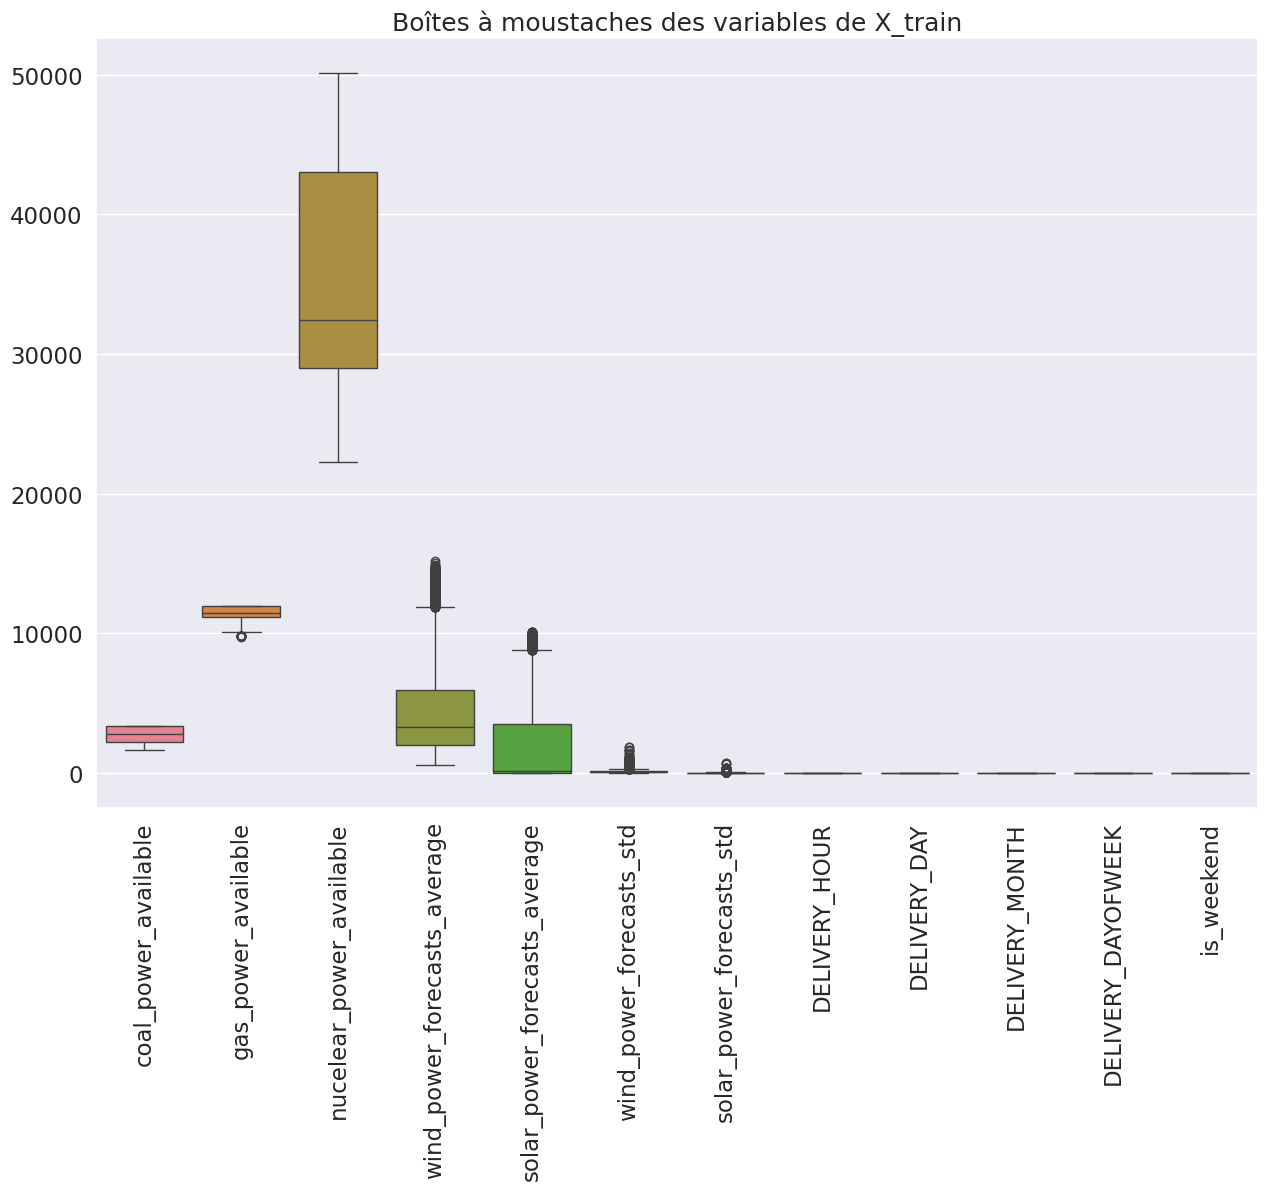

In [19]:



# Afficher toutes les boîtes à moustaches
plt.figure(figsize=(15,10))  # Ajuster la taille de la figure si besoin
sns.boxplot(data=X_train)
plt.xticks(rotation=90)  # Tourner les labels des colonnes si besoin
plt.title("Boîtes à moustaches des variables de X_train")
plt.show()


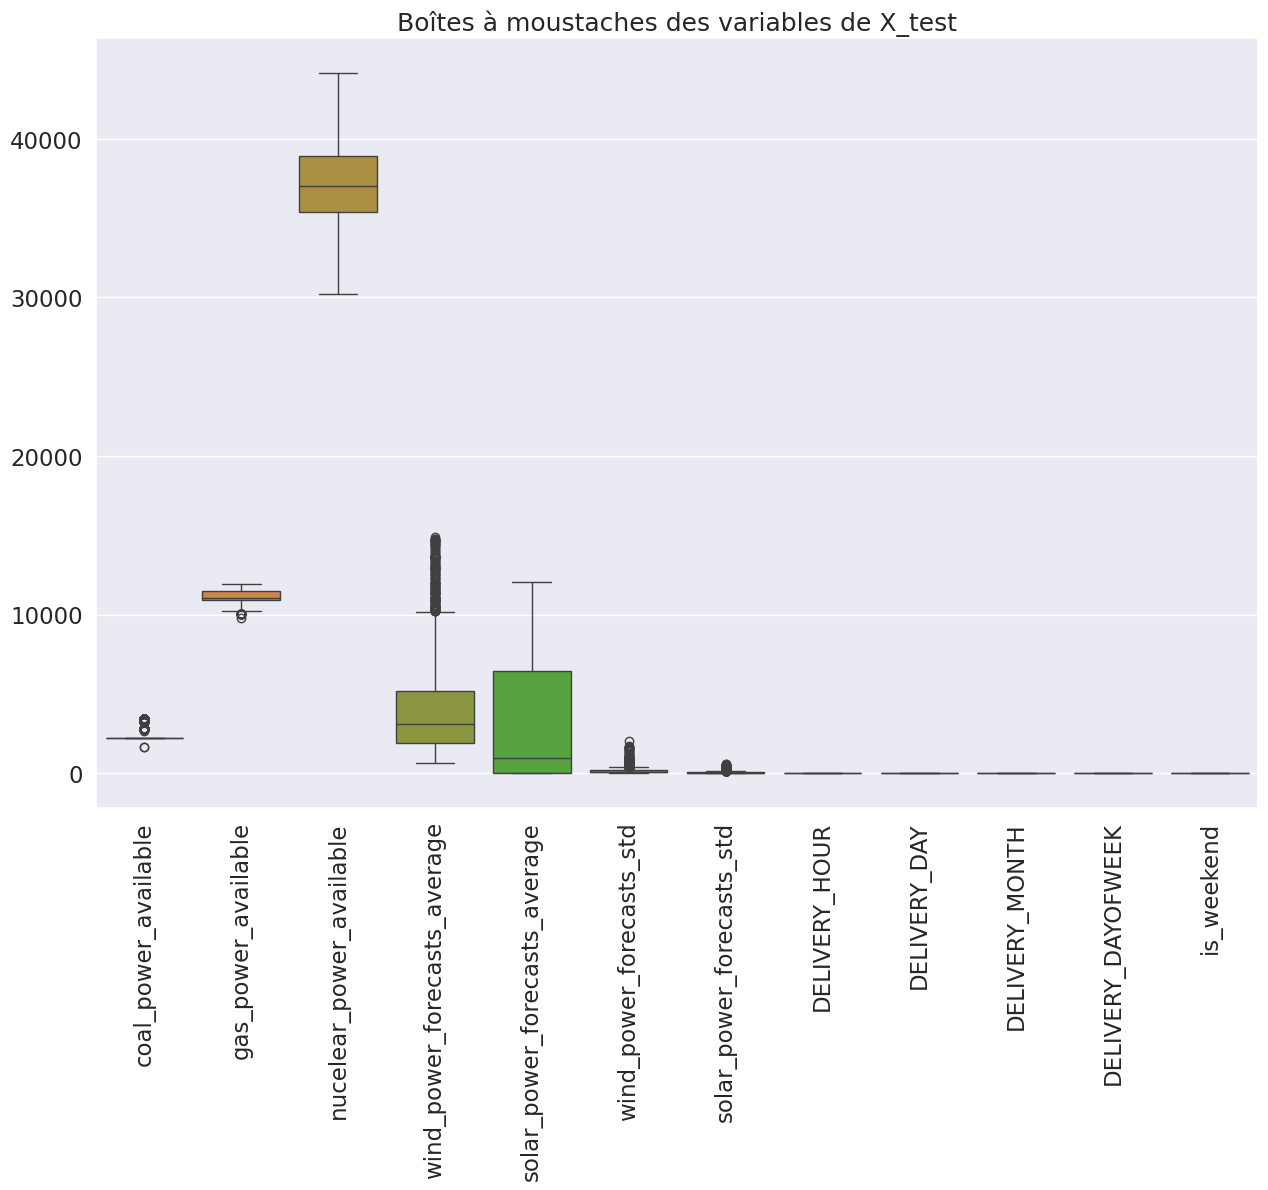

In [20]:



# Afficher toutes les boîtes à moustaches
plt.figure(figsize=(15,10))  # Ajuster la taille de la figure si besoin
sns.boxplot(data=X_test)
plt.xticks(rotation=90)  # Tourner les labels des colonnes si besoin
plt.title("Boîtes à moustaches des variables de X_test")
plt.show()


In [21]:

print(X_train.dtypes)

coal_power_available             float64
gas_power_available              float64
nucelear_power_available         float64
wind_power_forecasts_average     float64
solar_power_forecasts_average    float64
wind_power_forecasts_std         float64
solar_power_forecasts_std        float64
DELIVERY_HOUR                      int32
DELIVERY_DAY                       int32
DELIVERY_MONTH                     int32
DELIVERY_DAYOFWEEK                 int32
is_weekend                         int64
dtype: object


In [22]:
print(X_test.dtypes)

coal_power_available             float64
gas_power_available              float64
nucelear_power_available         float64
wind_power_forecasts_average     float64
solar_power_forecasts_average    float64
wind_power_forecasts_std         float64
solar_power_forecasts_std        float64
DELIVERY_HOUR                      int32
DELIVERY_DAY                       int32
DELIVERY_MONTH                     int32
DELIVERY_DAYOFWEEK                 int32
is_weekend                         int64
dtype: object


In [23]:
print(y_train.dtypes)

spot_id_delta         float64
DELIVERY_HOUR           int32
DELIVERY_DAYOFWEEK      int32
DELIVERY_MONTH          int32
is_weekend              int64
dtype: object


array([[<Axes: title={'center': 'coal_power_available'}>,
        <Axes: title={'center': 'gas_power_available'}>,
        <Axes: title={'center': 'nucelear_power_available'}>],
       [<Axes: title={'center': 'wind_power_forecasts_average'}>,
        <Axes: title={'center': 'solar_power_forecasts_average'}>,
        <Axes: title={'center': 'wind_power_forecasts_std'}>],
       [<Axes: title={'center': 'solar_power_forecasts_std'}>,
        <Axes: title={'center': 'DELIVERY_HOUR'}>,
        <Axes: title={'center': 'DELIVERY_DAY'}>],
       [<Axes: title={'center': 'DELIVERY_MONTH'}>,
        <Axes: title={'center': 'DELIVERY_DAYOFWEEK'}>,
        <Axes: title={'center': 'is_weekend'}>]], dtype=object)

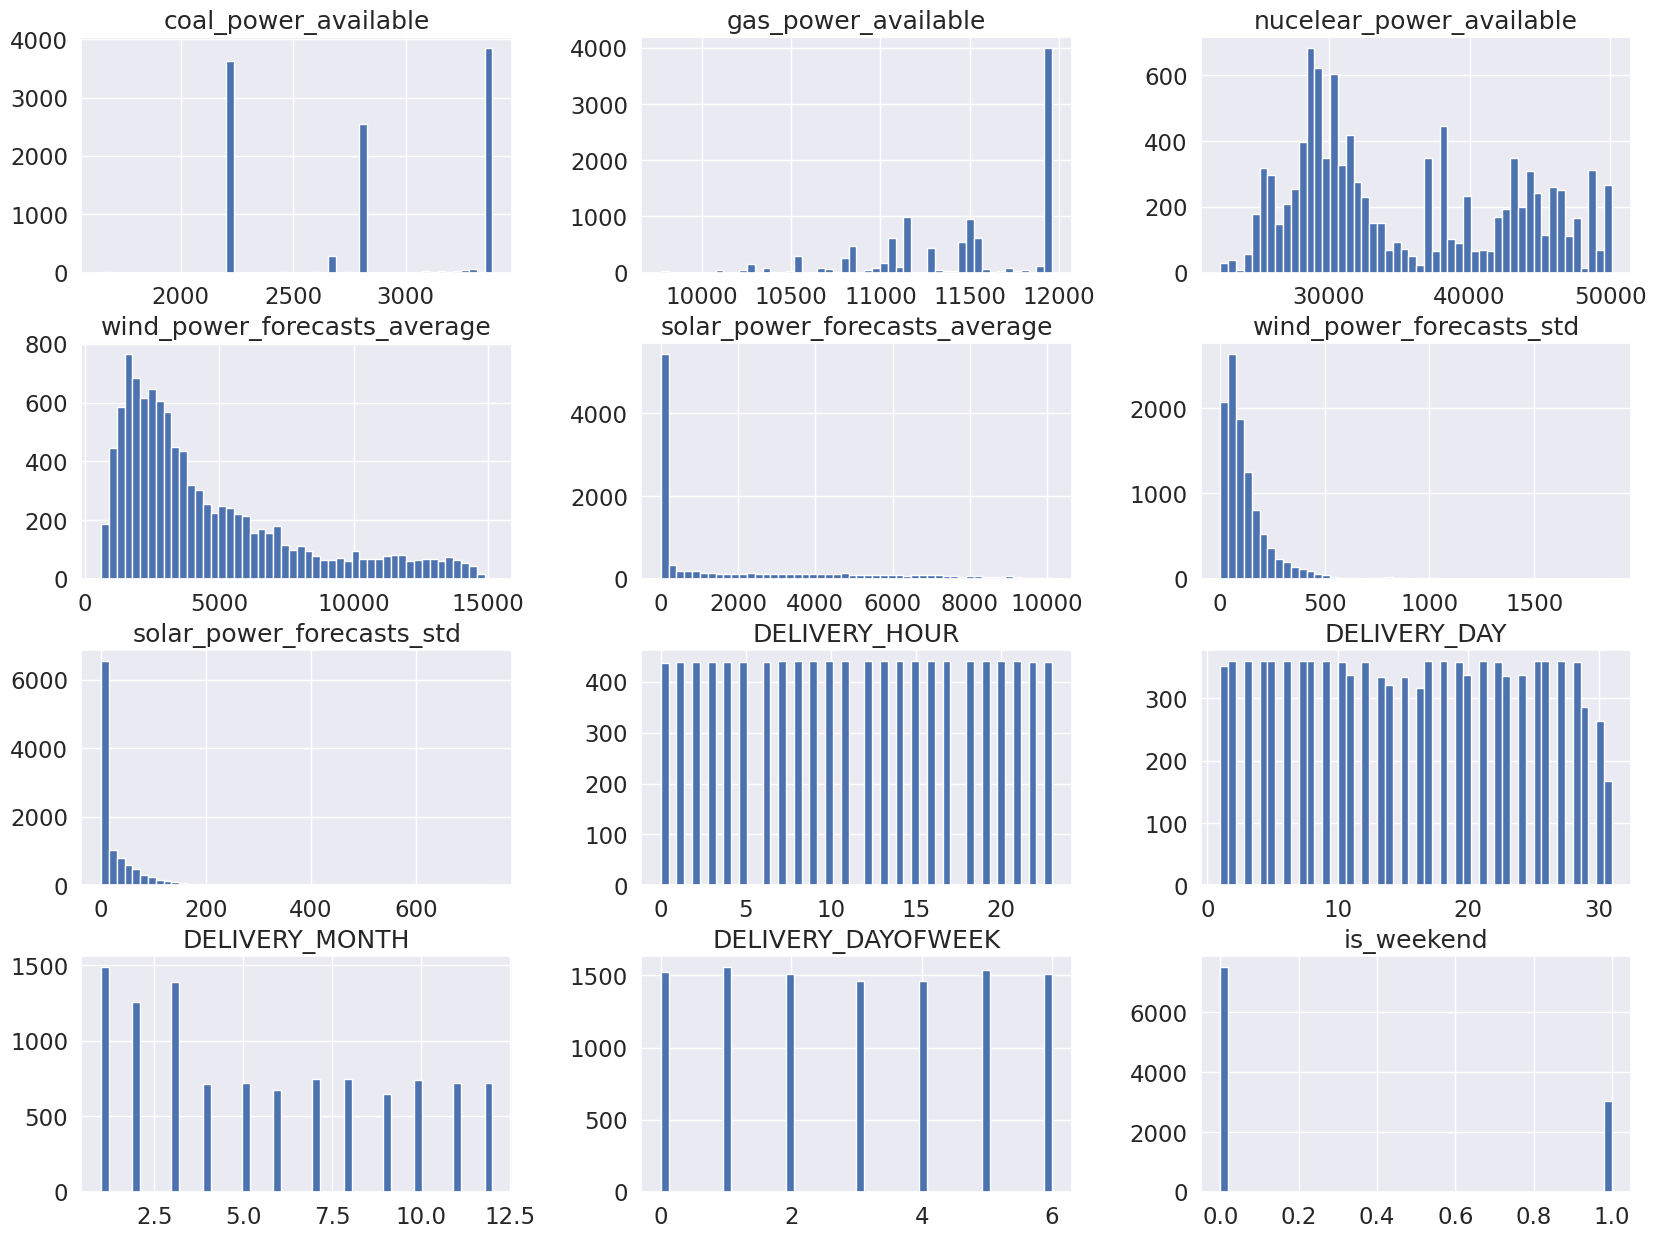

In [24]:
X_train.hist(bins=50, figsize=(20,15))


array([[<Axes: title={'center': 'coal_power_available'}>,
        <Axes: title={'center': 'gas_power_available'}>,
        <Axes: title={'center': 'nucelear_power_available'}>],
       [<Axes: title={'center': 'wind_power_forecasts_average'}>,
        <Axes: title={'center': 'solar_power_forecasts_average'}>,
        <Axes: title={'center': 'wind_power_forecasts_std'}>],
       [<Axes: title={'center': 'solar_power_forecasts_std'}>,
        <Axes: title={'center': 'DELIVERY_HOUR'}>,
        <Axes: title={'center': 'DELIVERY_DAY'}>],
       [<Axes: title={'center': 'DELIVERY_MONTH'}>,
        <Axes: title={'center': 'DELIVERY_DAYOFWEEK'}>,
        <Axes: title={'center': 'is_weekend'}>]], dtype=object)

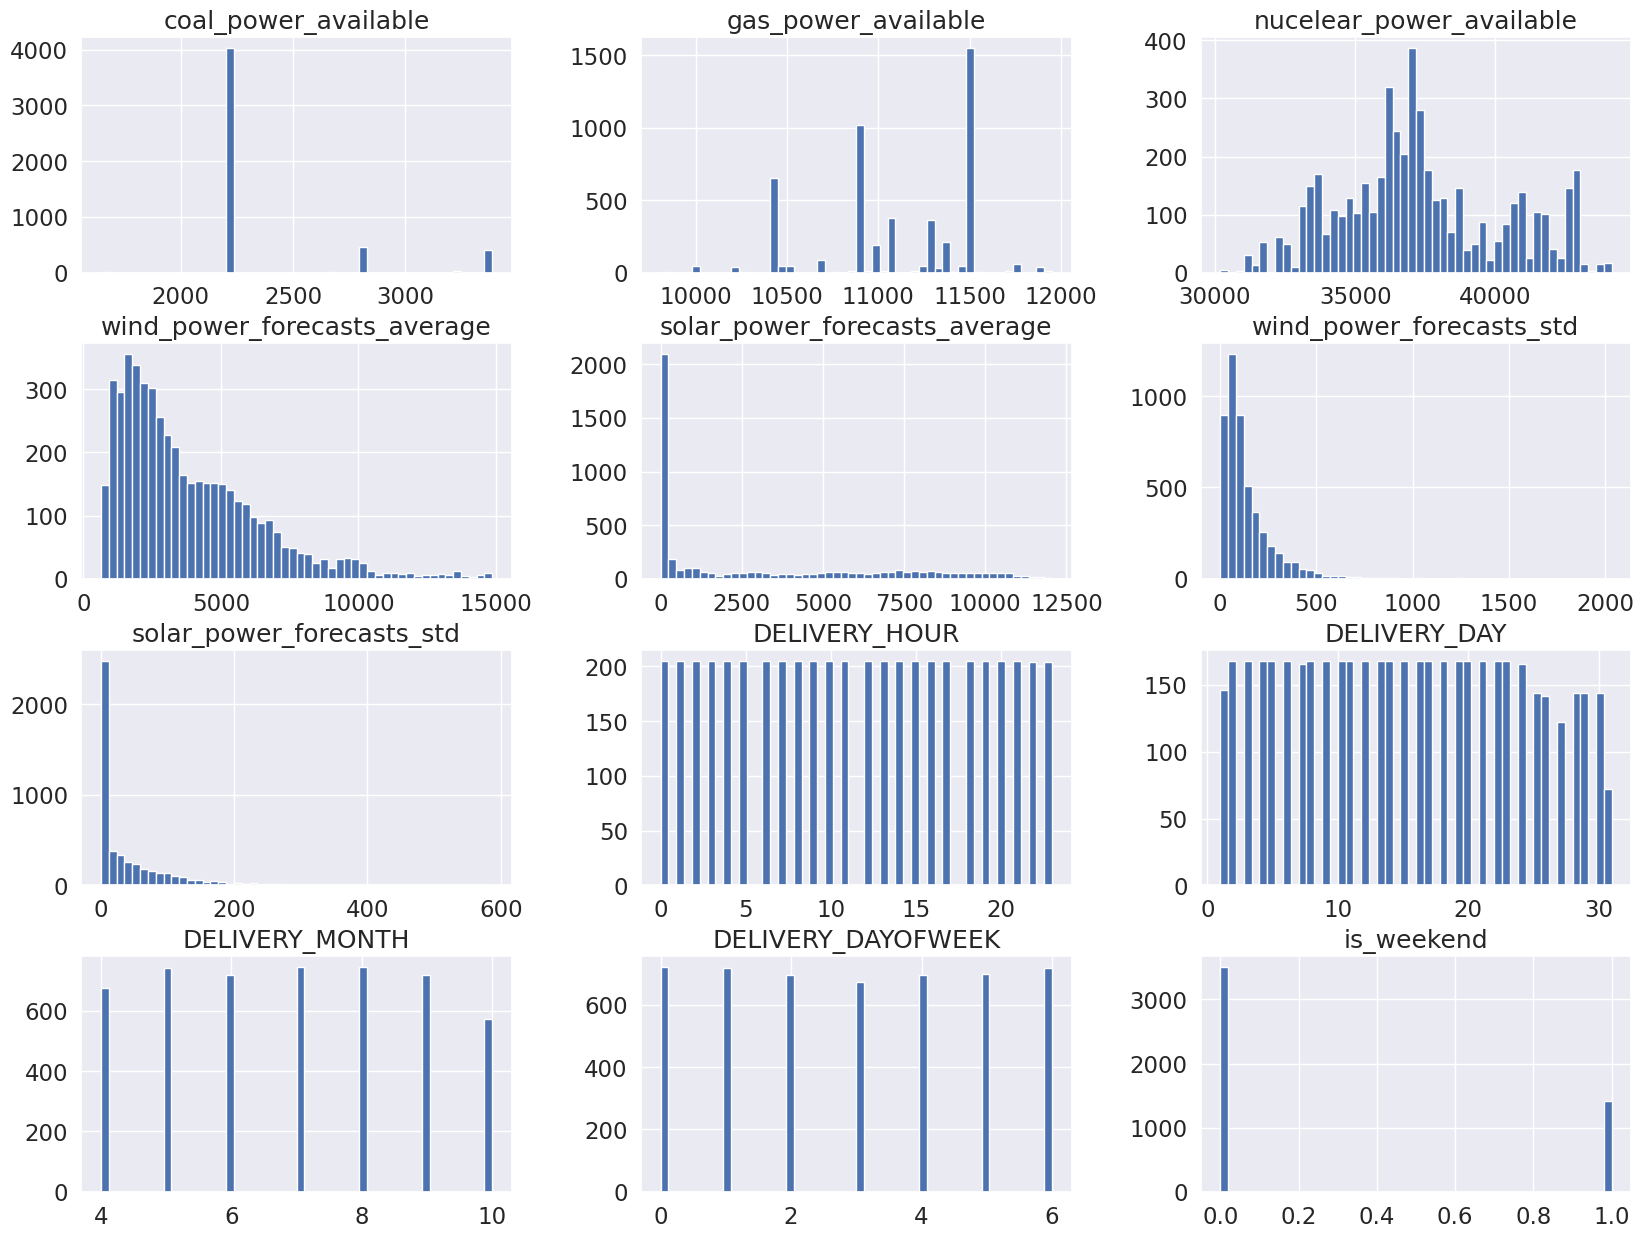

In [25]:
X_test.hist(bins=50, figsize=(20,15))


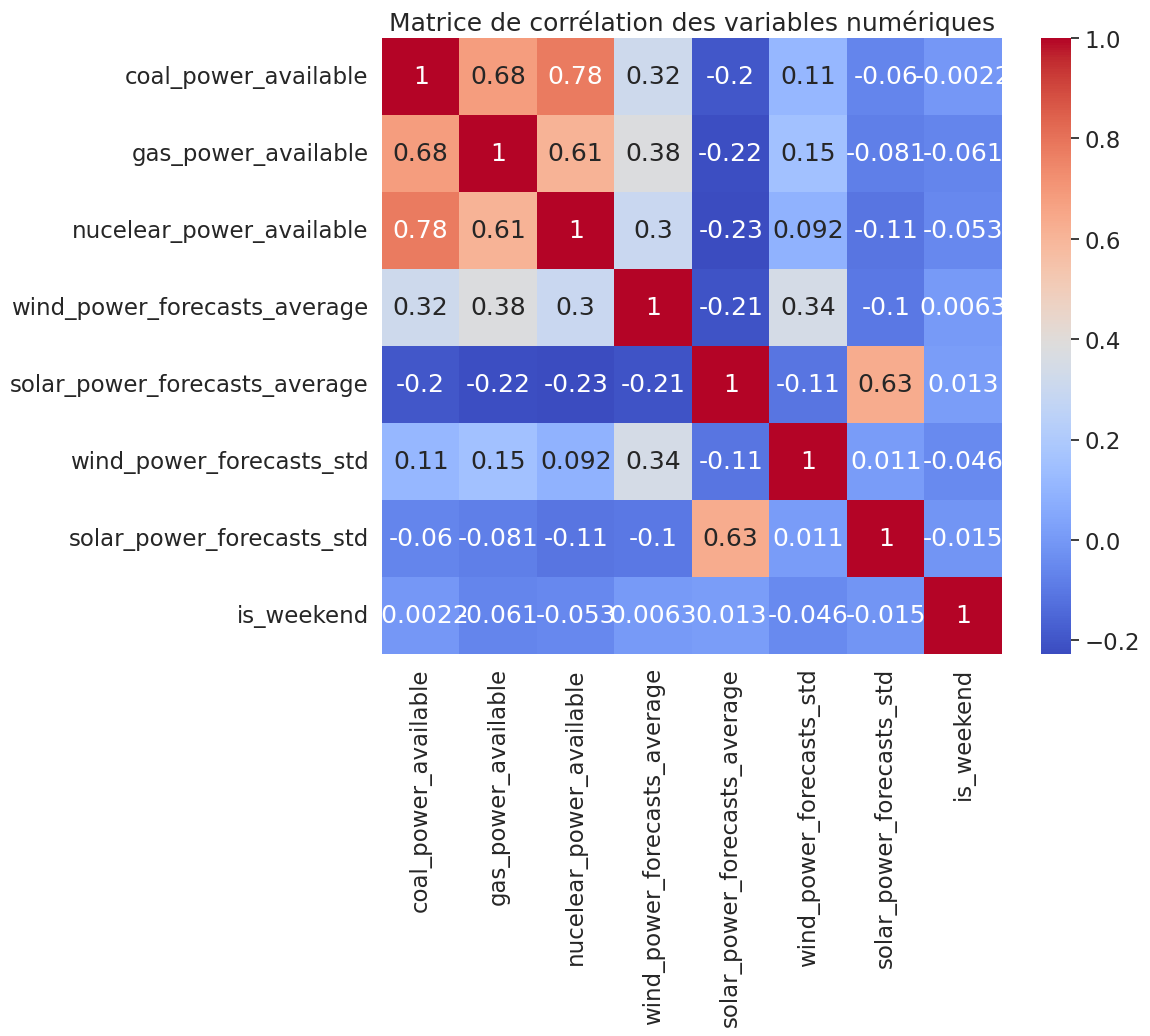

In [26]:


# Filtrer les colonnes numériques uniquement
X_train = X_train.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation
corr_matrix = X_train.corr()

# Affichage de la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure si besoin
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des variables numériques')
plt.show()


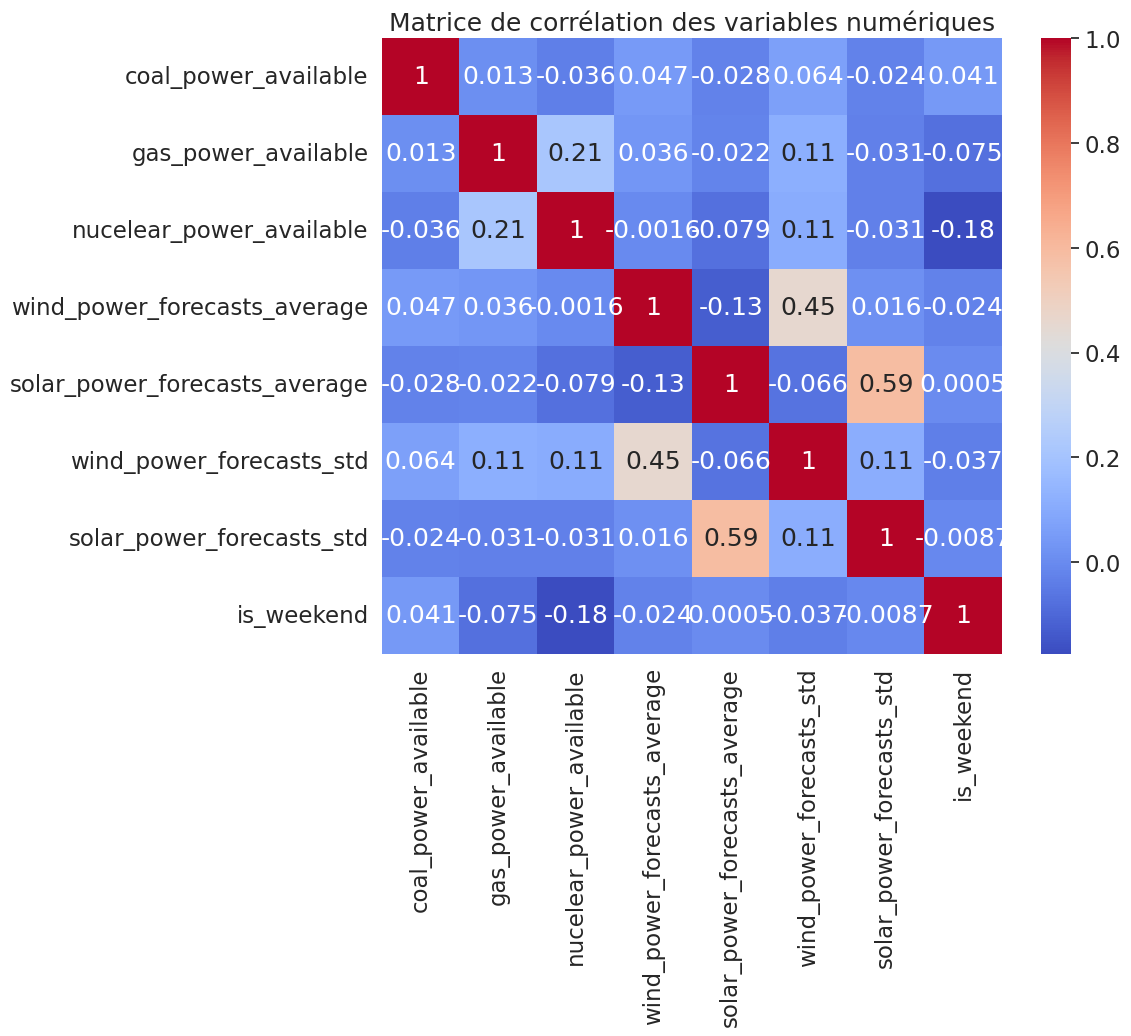

In [27]:
# Filtrer les colonnes numériques uniquement
X_test = X_test.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation
corr_matrix1 = X_test.corr()

# Affichage de la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure si besoin
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des variables numériques')
plt.show()

In [28]:
print("Colonnes de X_train :")
print(X_train.columns)

print("\nColonnes de X_test :")
print(X_test.columns)

# Vérifier les colonnes manquantes ou supplémentaires
missing_in_test = set(X_train.columns) - set(X_test.columns)
missing_in_train = set(X_test.columns) - set(X_train.columns)

print(f"\nColonnes manquantes dans X_test : {missing_in_test}")
print(f"Colonnes manquantes dans X_train : {missing_in_train}")


Colonnes de X_train :
Index(['coal_power_available', 'gas_power_available',
       'nucelear_power_available', 'wind_power_forecasts_average',
       'solar_power_forecasts_average', 'wind_power_forecasts_std',
       'solar_power_forecasts_std', 'is_weekend'],
      dtype='object')

Colonnes de X_test :
Index(['coal_power_available', 'gas_power_available',
       'nucelear_power_available', 'wind_power_forecasts_average',
       'solar_power_forecasts_average', 'wind_power_forecasts_std',
       'solar_power_forecasts_std', 'is_weekend'],
      dtype='object')

Colonnes manquantes dans X_test : set()
Colonnes manquantes dans X_train : set()


In [29]:
# Si x_train avait été nettoyé avant la normalisation
y_train = y_train.loc[X_train.index]


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print(X_train.head())

   coal_power_available  gas_power_available  nucelear_power_available  \
0              1.144557             0.053682                  1.148112   
1              1.144557             0.053682                  1.148112   
2              1.144557             0.053682                  1.148112   
3              1.144557             0.053682                  1.148112   
4              1.144557             0.053682                  1.148112   

   wind_power_forecasts_average  solar_power_forecasts_average  \
0                     -0.442725                       -0.70968   
1                     -0.410497                       -0.70968   
2                     -0.367228                       -0.70968   
3                     -0.319781                       -0.70968   
4                     -0.250551                       -0.70968   

   wind_power_forecasts_std  solar_power_forecasts_std  is_weekend  
0                 -0.350163                  -0.580714    1.570563  
1                 -0

In [31]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)


In [32]:
print(X_train.value_counts())

coal_power_available  gas_power_available  nucelear_power_available  wind_power_forecasts_average  solar_power_forecasts_average  wind_power_forecasts_std  solar_power_forecasts_std  is_weekend
-2.373049             1.000392              1.061810                 -0.702937                     -0.709680                      -0.709389                 -0.580714                  -0.636715     1
 1.144557             0.053682              1.187198                  0.233764                     -0.709680                       1.541628                 -0.580714                   1.570563     1
                                                                      1.003058                     -0.709680                       0.846515                 -0.580714                   1.570563     1
                                                                      1.143608                     -0.709680                       0.386317                 -0.580714                   1.570563     1
          

In [33]:
y_train = (y_train > 0).astype(int)
#1 indique que spot_id_delta est positif.
#0 indique que spot_id_delta est négatif ou nul.

In [34]:
y_train.head()

,spot_id_delta,DELIVERY_HOUR,DELIVERY_DAYOFWEEK,DELIVERY_MONTH,is_weekend
0,0,1,1,1,1
1,0,1,1,1,1
2,0,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


In [35]:
X_test = pd.DataFrame(X_test, columns=X_train.columns)

In [36]:
# Si y_train est un DataFrame, sélectionner la colonne cible
if isinstance(y_train, pd.DataFrame):
    y_train = y_train['spot_id_delta']  # Remplacez 'target_column' par le nom de la colonne cible


In [37]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

# Exemple de validation croisée
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Weighted Accuracy comme métrique personnalisée
def weighted_accuracy(y_true, y_pred):
    weights = abs(y_true)
    correct = (y_true == y_pred) * weights
    return correct.sum() / weights.sum()

weighted_accuracy_scorer = make_scorer(weighted_accuracy, greater_is_better=True)


In [38]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
y_class = (y_train > 0).astype(int)


In [39]:
X_tr, X_val, y_tr_class, y_val_class = train_test_split(
    X_train,
    y_class,      # la cible binaire
    test_size=0.2,
    random_state=42
)

# Parallèlement, on a besoin de y_tr_val_num : la version "numérique" de la cible
# pour pouvoir calculer la Weighted Accuracy plus tard.
y_tr_num, y_val_num = train_test_split(y_train, test_size=0.2, random_state=42)


model_logreg =LogisticRegression(C=10, penalty='l2', solver='saga', class_weight='balanced')


param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Plus large
    'penalty': ['l2', 'l1'],  # Ajouter 'l1' si le solver le supporte
    'solver': ['liblinear', 'saga']  # S'assurer que le solver supporte l1
}


grid_logreg = GridSearchCV(
    estimator=model_logreg,
    param_grid=param_grid_logreg,
    scoring='accuracy',  # on peut mettre 'accuracy', 'f1', etc.
    cv=3,
    n_jobs=-1
)
grid_logreg.fit(X_tr, y_tr_class)

print("Meilleurs hyperparamètres :", grid_logreg.best_params_)


Meilleurs hyperparamètres : {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


In [40]:
# Meilleur modèle issu de la GridSearch
best_logreg = grid_logreg.best_estimator_

# Prédictions binaires sur le set de validation
y_val_pred_class = best_logreg.predict(X_val)

# Conversion binaire (0/1) en -1 ou +1
y_val_pred_sign = np.where(y_val_pred_class == 1, 1, -1)

# Calcul de la Weighted Accuracy sur la base du y_val_num (écart réel)
val_score_logreg = weighted_accuracy(y_val_num, y_val_pred_sign)
print("Weighted Accuracy (validation) :", val_score_logreg)


Weighted Accuracy (validation) : 0.5191256830601093


In [41]:
# On fixe les hyperparamètres optimaux trouvés
final_logreg = LogisticRegression(
    C=grid_logreg.best_params_['C'],
    penalty=grid_logreg.best_params_['penalty'],
    random_state=42,
    max_iter=2000
)

# Entraînement sur tout le jeu "train"
final_logreg.fit(X_train, y_class)


LogisticRegression(C=0.01, max_iter=2000, random_state=42)

In [42]:
y_test_pred_class = final_logreg.predict(X_test)  # 0 ou 1
y_test_pred_sign = np.where(y_test_pred_class == 1, 1, -1)


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
def weighted_accuracy(y_true, y_pred):
    """
    Calcul de la Weighted Accuracy en fonction du signe prédit.
    y_true : écart réel (valeur numérique)
    y_pred : écart prédit (valeur signée, -1 ou +1)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    correct_sign = (y_true * y_pred) > 0  # Même signe => correct
    numerateur = np.sum(correct_sign * np.abs(y_true))
    denominateur = np.sum(np.abs(y_true))
    return numerateur / denominateur

# Création d’un scorer compatible scikit-learn :
weighted_accuracy_scorer = make_scorer(weighted_accuracy, greater_is_better=True)


In [44]:
# Définition du modèle Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Grille d’hyperparamètres à explorer
param_grid_rf = {
    'n_estimators': [50, 100, 200],     # Nombre d'arbres
    'max_depth': [3, 5, 10, None],     # Profondeur maximale
    'min_samples_split': [2, 5, 10],   # Taille minimale pour splitter un nœud
    'min_samples_leaf': [1, 2, 4],     # Nombre minimum d’échantillons par feuille
}


In [45]:
grid_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid_rf,
    scoring=weighted_accuracy_scorer,  # Utiliser Weighted Accuracy
    cv=3,                              # Validation croisée
    n_jobs=-1,                         # Utiliser tous les cœurs disponibles
    verbose=1                          # Afficher la progression
)

# Entraînement avec Grid Search
grid_rf.fit(X_train, y_class)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_rf.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [46]:
# Division des données en entraînement et validation
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Entraîner le modèle sur X_tr et y_tr
best_rf = grid_rf.best_estimator_

# Prédictions sur le jeu de validation (X_val)
y_val_pred_class = best_rf.predict(X_val)  # 0 ou 1
y_val_pred_sign = np.where(y_val_pred_class == 1, 1, -1)  # Convertir en -1 ou +1

# Calcul de la Weighted Accuracy en utilisant les cibles de validation
val_score_rf = weighted_accuracy(y_val, y_val_pred_sign)
print("Weighted Accuracy (validation) :", val_score_rf)


Weighted Accuracy (validation) : 0.9717668488160291


In [47]:
# Prédiction sur le test final
y_test_pred_class = best_rf.predict(X_test)  # 0 ou 1
y_test_pred_sign = np.where(y_test_pred_class == 1, 1, -1)

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer

# Fonction de Weighted Accuracy
def weighted_accuracy(y_true, y_pred):
    """
    Calcul de la Weighted Accuracy
    y_true : écart réel (valeur numérique)
    y_pred : écart prédit (-1 ou +1)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    correct_sign = (y_true * y_pred) > 0  # Même signe => correct
    numerateur = np.sum(correct_sign * np.abs(y_true))
    denominateur = np.sum(np.abs(y_true))
    return numerateur / denominateur

# Scorer compatible avec scikit-learn
weighted_accuracy_scorer = make_scorer(weighted_accuracy, greater_is_better=True)

# Cible binaire pour classification
y_class = (y_train > 0).astype(int)

# Diviser les données en train et validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_tr_class, X_val_class, y_tr_class, y_val_class = train_test_split(X_train, y_class, test_size=0.2, random_state=42)

# Liste des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(C=10, penalty='l2', solver='saga', max_iter=2000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
}

# Résultats
results = []

for model_name, model in models.items():
    print(f"\nEntraînement du modèle : {model_name}")

    # Entraînement
    if "Logistic" in model_name:
        model.fit(X_tr, y_tr_class)  # Régression logistique
    else:
        model.fit(X_tr_class, y_tr_class)  # Autres modèles

    # Prédictions sur le set de validation
    y_val_pred_class = model.predict(X_val_class)
    y_val_pred_sign = np.where(y_val_pred_class == 1, 1, -1)  # Convertir en -1 ou +1

    # Calcul de la Weighted Accuracy
    val_score = weighted_accuracy(y_val, y_val_pred_sign)
    print(f"Weighted Accuracy pour {model_name} : {val_score:.4f}")

    # Ajouter au tableau des résultats
    results.append({"Model": model_name, "Weighted Accuracy": val_score})

# Comparer les résultats
results_df = pd.DataFrame(results).sort_values(by="Weighted Accuracy", ascending=False)
print("\nRésultats comparatifs :")
print(results_df)

# Sauvegarder les résultats
results_df.to_csv("model_comparison_results.csv", index=False)


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



Entraînement du modèle : Logistic Regression
Weighted Accuracy pour Logistic Regression : 0.4918

Entraînement du modèle : Random Forest
Weighted Accuracy pour Random Forest : 0.6894

Entraînement du modèle : XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:41:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Weighted Accuracy pour XGBoost : 0.7013

Entraînement du modèle : LightGBM
[LightGBM] [Info] Number of positive: 4205, number of negative: 4239
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1347
[LightGBM] [Info] Number of data points in the train set: 8444, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497987 -> initscore=-0.008053
[LightGBM] [Info] Start training from score -0.008053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [49]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

# Recherche manuelle pour XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

best_score_xgb = 0
best_params_xgb = {}

for n_estimators in param_grid_xgb['n_estimators']:
    for max_depth in param_grid_xgb['max_depth']:
        for learning_rate in param_grid_xgb['learning_rate']:
            for subsample in param_grid_xgb['subsample']:
                for colsample_bytree in param_grid_xgb['colsample_bytree']:
                    model_xgb = XGBClassifier(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        learning_rate=learning_rate,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        use_label_encoder=False,
                        eval_metric='logloss',
                        random_state=42
                    )
                    model_xgb.fit(X_tr_class, y_tr_class)
                    y_val_pred = model_xgb.predict(X_val_class)
                    score = accuracy_score(y_val_class, y_val_pred)

                    if score > best_score_xgb:
                        best_score_xgb = score
                        best_params_xgb = {
                            'n_estimators': n_estimators,
                            'max_depth': max_depth,
                            'learning_rate': learning_rate,
                            'subsample': subsample,
                            'colsample_bytree': colsample_bytree,
                        }

print("Meilleurs hyperparamètres XGBoost :", best_params_xgb)
print("Meilleur score (accuracy) XGBoost :", best_score_xgb)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:41:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:41:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:41:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:41:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:41:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Meilleurs hyperparamètres XGBoost : {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 1.0}
Meilleur score (accuracy) XGBoost : 0.7457386363636364


In [50]:
# Recherche manuelle pour LightGBM
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

best_score_lgb = 0
best_params_lgb = {}

for n_estimators in param_grid_lgb['n_estimators']:
    for max_depth in param_grid_lgb['max_depth']:
        for learning_rate in param_grid_lgb['learning_rate']:
            for subsample in param_grid_lgb['subsample']:
                for colsample_bytree in param_grid_lgb['colsample_bytree']:
                    model_lgb = LGBMClassifier(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        learning_rate=learning_rate,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        random_state=42
                    )
                    model_lgb.fit(X_tr_class, y_tr_class)
                    y_val_pred = model_lgb.predict(X_val_class)
                    score = accuracy_score(y_val_class, y_val_pred)

                    if score > best_score_lgb:
                        best_score_lgb = score
                        best_params_lgb = {
                            'n_estimators': n_estimators,
                            'max_depth': max_depth,
                            'learning_rate': learning_rate,
                            'subsample': subsample,
                            'colsample_bytree': colsample_bytree,
                        }

print("Meilleurs hyperparamètres LightGBM :", best_params_lgb)
print("Meilleur score (accuracy) LightGBM :", best_score_lgb)


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

# **Compromis Biais-Variance**

SHAP Summary Plot for Random Forest


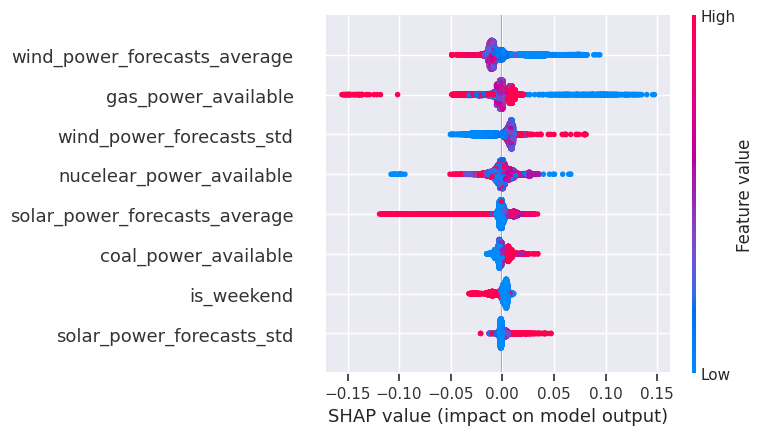

SHAP Summary Plot for XGBoost


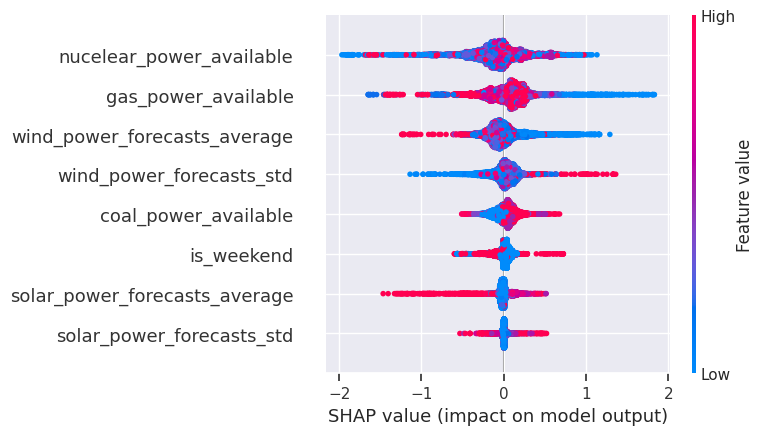

In [51]:
import shap
import matplotlib.pyplot as plt

# Entraînez votre modèle
rf_model = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
rf_model.fit(X_train, y_class)

# Expliquez les prédictions avec SHAP
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_train)

# Résumé global des caractéristiques
print("SHAP Summary Plot for Random Forest")

# Select SHAP values for a specific class (e.g., class 1)
# Reshape shap_values_rf for binary classification (keep all samples)
shap_values_rf_class1 = shap_values_rf[:, :, 1]  # SHAP values for class 1, all samples

# Now use the correctly reshaped shap values
shap.summary_plot(shap_values_rf_class1, X_train)

# Pour XGBoost
xgb_model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_class)

explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_train)

print("SHAP Summary Plot for XGBoost")
shap.summary_plot(shap_values_xgb, X_train)

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_class)
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Meilleurs paramètres : {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Meilleure précision : 0.42629817084903027
